# Ejercicio 1
Complete la tabla indicando cuántos atributos corresponden a cada del dataset de obesidad.

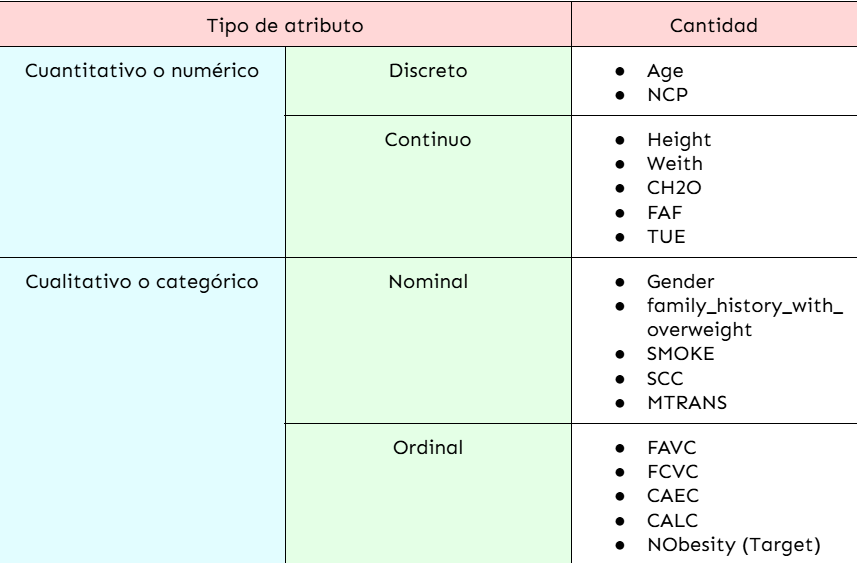

# Ejercicio 2
Proponga una tarea de clasificación y una tarea de regresión que puedan realizarse a partir de los datos del 
dataset de obesidad.



Problema de clasificación (que el resultado sea discreto):
Objetivo: predecir la categoría de obesidad de un individuo.
Variable target: NObesity (Target)
Clases posibles:
Insufficient_Weight
Normal_Weight
Overweight_Level_I
Overweight_Level_II
Obesity_Type_I
Obesity_Type_II
Obesity_Type_III


Ejemplo de problema:
A partir de los hábitos de alimentación (FAVC, FCVC, NCP, CAEC), actividad física (FAF), antecedentes familiares (family_history_with_overweight) y factores de estilo de vida (SMOKE, TUE, MTRANS, etc.), predecir si una persona será clasificada como peso normal, sobrepeso o en algún nivel de obesidad.

Problema de regresión (que el resultado sea continuo):
Objetivo: predecir el peso exacto de una persona en kilogramos.
Variable target: Weight
Predictores posibles:
Height, Age, Gender
Hábitos de alimentación (FAVC, FCVC, NCP, CAEC, etc.)
Estilo de vida (FAF, TUE, MTRANS)


Ejemplo de problema:
Estimar el peso de un individuo en función de su altura, edad y hábitos de vida (alimentación, ejercicio, transporte, consumo de alcohol, etc.).

# Ejercicio 3
Indique qué tipo de información brindan las siguientes representaciones gráficas: 
a) Diagrama de Barras  
b) Histograma 
c) Diagrama de caja  
d) Diagrama de dispersión 
Luego, genere al menos un ejemplo de cada representación usando el dataset de obesidad y explique 
cómo interpretar cada uno. 


a) Diagrama de Barras: muestra comparaciones entre categorías. Es útil para datos cualitativos o discretos, permitiendo visualizar la frecuencia o cantidad en cada grupo.

b) Histograma: muestra la distribución de frecuencias de datos continuos. Permite ver cómo se distribuyen los valores (simetría, sesgo, concentración, etc.).

c) Diagrama de Caja (Boxplot): resume la dispersión y simetría de un conjunto de datos numéricos mostrando cuartiles, mediana y valores atípicos.

d) Diagrama de Dispersión: representa la relación entre dos variables numéricas, mostrando tendencias, correlaciones o patrones entre ellas.


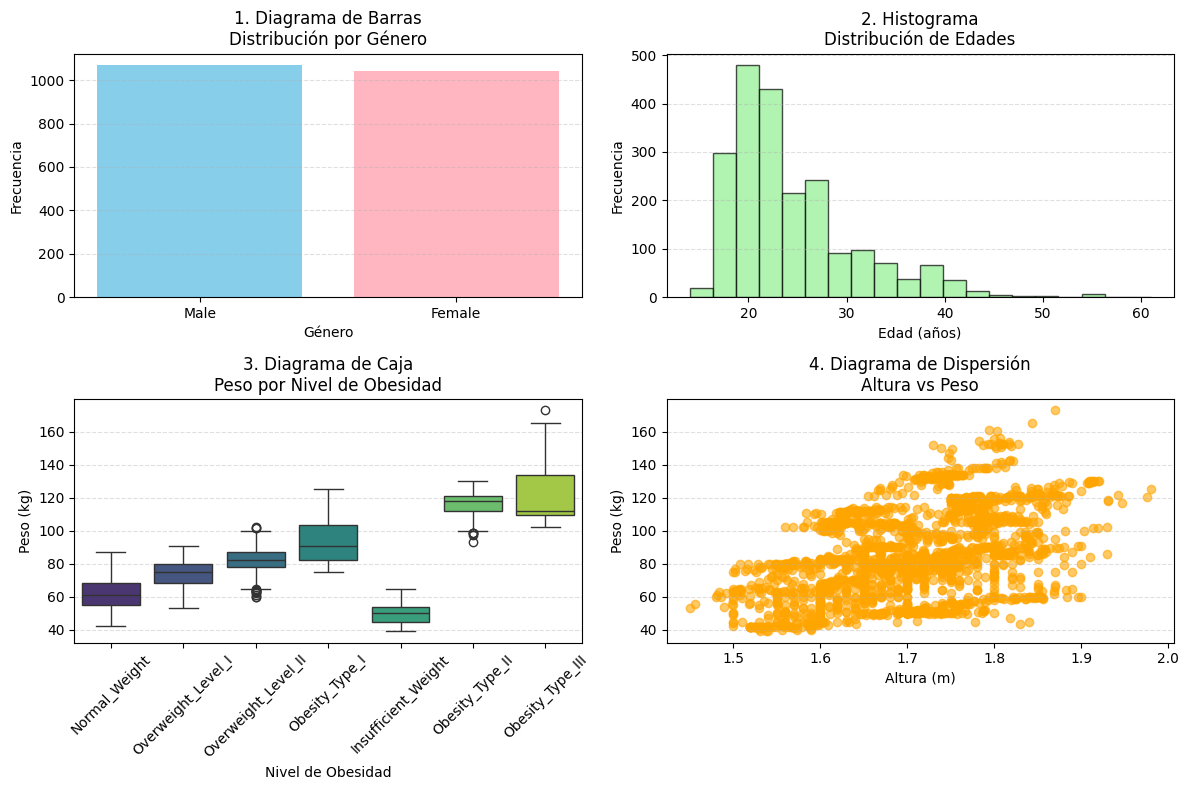

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('obesity_uci.csv')


# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. Diagrama de Barras - Género
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightpink'])
plt.title('1. Diagrama de Barras\nDistribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 2. Histograma - Edad
plt.subplot(2, 2, 2)
plt.hist(df['Age'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('2. Histograma\nDistribución de Edades')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 3. Diagrama de Caja - Peso por Obesidad
plt.subplot(2, 2, 3)
sns.boxplot(x='NObesity', y='Weight', data=df, hue='NObesity', palette='viridis', legend=False)
plt.title('3. Diagrama de Caja\nPeso por Nivel de Obesidad')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Peso (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 4. Diagrama de Dispersión - Altura vs Peso
plt.subplot(2, 2, 4)
plt.scatter(df['Height'], df['Weight'], alpha=0.6, color='orange')
plt.title('4. Diagrama de Dispersión\nAltura vs Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(axis='y',alpha=0.4, linestyle='--')


plt.tight_layout()
plt.show()

# Ejercicio 4
Complete el siguiente cuadro y dibuje el diagrama de caja del atributo “weight”

<function matplotlib.pyplot.show(close=None, block=None)>

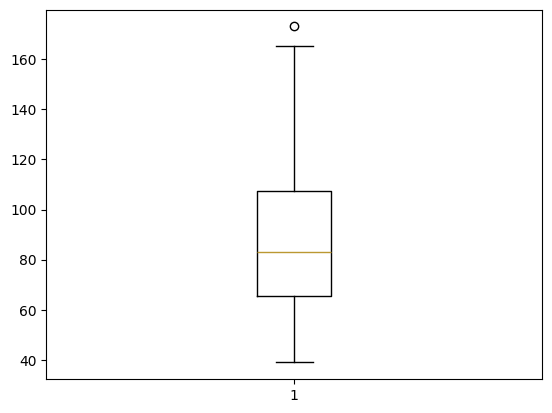

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('obesity_uci.csv')

plt.boxplot(df['Weight'])
plt.show

In [91]:
max = df['Weight'].max()
min = df['Weight'].min()
q1 = df['Weight'].quantile(0.25)
q2 = df['Weight'].median()
q3 = df['Weight'].quantile(0.75)

ric = q3 - q1
big_sup_rango = q3 + 1.5 * ric
big_sup = df['Weight'][df['Weight'] < big_sup_rango].max()
big_inf_rango = q1 - 1.5 * ric
big_inf = df['Weight'][df['Weight'] > big_inf_rango].min()

inter_inf_atip= (q1 - 3 * ric, q1 - 1.5 * ric)
inter_sup_atip= (q3 + 1.5 * ric, q3 + 3 * ric)

valor_atipico = df[
    (df['Weight'] > inter_inf_atip[0]) & (df['Weight'] <= inter_inf_atip[1]) |
    (df['Weight'] >= inter_sup_atip[0]) & (df['Weight'] < inter_sup_atip[1])
]

print(f"Max: {max}")
print(f"Min: {min}")
print(f"Q1: {q1}")
print(f"Median (Q2): {q2}")
print(f"Q3: {q3}")
print(f"RIC (IQR): {ric}")
print(f"Big sup: {big_sup}")
print(f"Big inf: {big_inf}")
print(f"Inter inf atip: {inter_inf_atip}")
print(f"Inter sup atip: {inter_sup_atip}")
print("Valores atípicos:")
print(valor_atipico)

Max: 173.0
Min: 39.0
Q1: 65.473343
Median (Q2): 83.0
Q3: 107.430682
RIC (IQR): 41.957339000000005
Big sup: 165.057269
Big inf: 39.0
Inter inf atip: (np.float64(-60.398674000000014), np.float64(2.537334499999993))
Inter sup atip: (np.float64(170.3666905), np.float64(233.30269900000002))
Valores atípicos:
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
344   Male  18.0    1.87   173.0                            yes  yes   3.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
344  3.0  Frequently    no   2.0  no  2.0  1.0  Sometimes   

                    MTRANS          NObesity  
344  Public_Transportation  Obesity_Type_III  


# Ejercicio 5
Los valores del atributo peso (“weight”) fueron agrupados según el atributo de antecedente de obesidad familiar (“family_history_with_overweight”). La figura muestra los diagramas de caja correspondientes. Complete el siguiente cuadro y responda verdadero o falso justificando cada afirmación según los valores 
obtenidos:

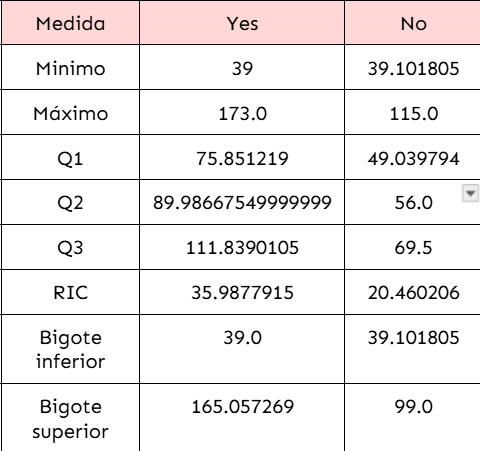

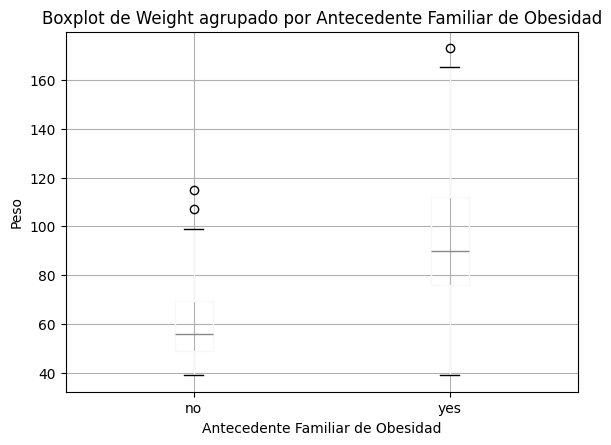

In [92]:
# Diagrama de caja de 'Weight' agrupado por 'family_history_with_overweight'
df.boxplot(column='Weight', by='family_history_with_overweight')
plt.title('Boxplot de Weight agrupado por Antecedente Familiar de Obesidad')
plt.suptitle('')
plt.xlabel('Antecedente Familiar de Obesidad')
plt.ylabel('Peso')
plt.show()

In [93]:
# Calcular max, min, Q1, Q2, Q3 para cada grupo de 'family_history_with_overweight'
for group, data in df.groupby('family_history_with_overweight'):
    print(f"Grupo: {group}")
    print(f"Max: {data['Weight'].max()}")
    print(f"Min: {data['Weight'].min()}")
    print(f"Q1: {data['Weight'].quantile(0.25)}")
    print(f"Q2 (mediana): {data['Weight'].median()}")
    print(f"Q3: {data['Weight'].quantile(0.75)}")
    print(f"RIC (IQR): {data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25)}")
    big_sup_rango = data['Weight'].quantile(0.75) + 1.5 * (data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25))
    big_inf_rango = data['Weight'].quantile(0.25) - 1.5 * (data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25))
    print(f"Big sup: {data['Weight'][data['Weight'] < big_sup_rango].max()}")
    print(f"Big inf: {data['Weight'][data['Weight'] > big_inf_rango].min()}")
    inter_inf_atip= (data['Weight'].quantile(0.25) - 3 * (data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25)),
                     data['Weight'].quantile(0.25) - 1.5 * (data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25)))
    inter_sup_atip= (data['Weight'].quantile(0.75) + 1.5 * (data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25)),
                     data['Weight'].quantile(0.75) + 3 * (data['Weight'].quantile(0.75) - data['Weight'].quantile(0.25)))
    print(f"Valores atípicos: {inter_inf_atip} {inter_sup_atip}")
    print("-" * 30)

Grupo: no
Max: 115.0
Min: 39.101805
Q1: 49.039794
Q2 (mediana): 56.0
Q3: 69.5
RIC (IQR): 20.460206
Big sup: 99.0
Big inf: 39.101805
Valores atípicos: (np.float64(-12.340823999999998), np.float64(18.349485)) (np.float64(100.190309), np.float64(130.880618))
------------------------------
Grupo: yes
Max: 173.0
Min: 39.0
Q1: 75.851219
Q2 (mediana): 89.98667549999999
Q3: 111.8390105
RIC (IQR): 35.9877915
Big sup: 165.057269
Big inf: 39.0
Valores atípicos: (np.float64(-32.1121555), np.float64(21.86953175)) (np.float64(165.82069775), np.float64(219.80238500000002))
------------------------------


a) Al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg: VERDADERO, al Q3 valer aprox 111 eso significa que el 25% de las personas con antecedentes familiares pesan más de eso que es mayor que 100 kg

b) Es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg. FALSO, sería atipico que pese más de 99.0 (bigote superior)

c) La mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg. FALSO, si es menor y es 56.0

d) Todos los valores atípicos para personas con antecedentes familiares de obesidad son leves. VERDADERO ya que se encuentra en el rango (q3 + 1.5 * ric, q3 + 3 * ric)

# Ejercicio 6
Discretice el atributo del consumo de agua diario en litros (“CH2O”) en tres intervalos: Bajo, Medio y Alto. Indique en la tabla los intervalos utilizados y la cantidad respectivas de ejemplos de cada uno al discretizar por rango y por intervalo. Luego, explique porque los ejemplos no quedaron divididos en intervalos con la 
misma cantidad de valores.

In [94]:
#Misma anchura
ch20 = pd.cut(df["CH2O"], 3, labels=["Bajo", "Medio", "Alto"])
print(ch20.value_counts())
#Divido en quantiles
ch20 = pd.qcut(df["CH2O"], 3, labels=["Bajo", "Medio", "Alto"])
print(ch20.value_counts())

CH2O
Medio    910
Alto     625
Bajo     576
Name: count, dtype: int64
CH2O
Bajo     704
Alto     704
Medio    703
Name: count, dtype: int64


# Ejercicio 7

### a) Visualice las primeras 5 filas y el resumen estadístico. 

### b) Identifique los atributos (columnas) con valores nulos y su porcentaje. 

In [95]:
df = pd.read_csv("titanic.csv")
na = df["Age"].isnull().sum()
all = df.shape[0]
print(na / all)

na = df["Cabin"].isnull().sum()
all = df.shape[0]
print(na / all)

0.19865319865319866
0.7710437710437711


### c) Analizar los valores faltantes y discutir cuales serían las alternativas posibles para tratarlos.

In [96]:
# Para la edad al faltar pocos valores les asigno el promedio a los nulos
print("Valores faltantes en 'Age' ANTES de imputar:", df['Age'].isnull().sum())
# df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df['Age'].mean())
print("Valores faltantes en 'Age' DESPUÉS de imputar:", df['Age'].isnull().sum())

# Para la Cabina que faltan muchos valores decido eliminar la columna
df = df.drop(columns=['Cabin'])

Valores faltantes en 'Age' ANTES de imputar: 177
29.69911764705882
Valores faltantes en 'Age' DESPUÉS de imputar: 177


### d) Los nombres de los pasajeros van acompañados de títulos que pueden ser importantes para la 
interpretación de los datos o para completar información faltante: 

i. Extrae el título (como Mr, Miss, Mrs, Master, etc.) del nombre de cada pasajero y crea una nueva columna llamada Title. 

ii. Unifica los valores para que queden Mr, Miss (Mlle, Ms), Mrs (Mme), Master, Others (resto).

iii. Computa las edades faltantes utilizando la edad promedio por categoría. 

In [97]:
# Extraer título
df['Title'] = df['Name'].str.extract(r', ([^\.]+)\.', expand=False)
display(df['Title'])

# Mostrar resultados
print("Títulos extraídos:")
print(df['Title'].value_counts())

# Verificar cuántos NO tienen título (son NaN)
missing_titles = df['Title'].isnull().sum()
print(f"\nNúmero de filas sin título: {missing_titles}")

# Unificar los obvios
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

# Agrupar todos los títulos poco frecuentes en 'Other'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Lady', 'Countess',
               'the Countess', 'Don', 'Dona', 'Jonkheer']

df['Title'] = df['Title'].replace(rare_titles, 'Other')

display(df['Title'].value_counts())

# Computo edades faltantes dependiendo del título
# Verificar valores faltantes antes y después
print("Valores faltantes en 'Age' ANTES de imputar:", df['Age'].isnull().sum())
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))
print("Valores faltantes en 'Age' DESPUÉS de imputar:", df['Age'].isnull().sum())


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

Títulos extraídos:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

Número de filas sin título: 0


Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

Valores faltantes en 'Age' ANTES de imputar: 177
Valores faltantes en 'Age' DESPUÉS de imputar: 0


### f) Cree un nuevo atributo FamilySize que contabiliza los integrantes de familia a partir de los atributos SibSp (hermanos y esposo) y Parch (padres e hijos). No olvidar contar a la persona. 

In [98]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

### g) Numerice los atributos categóricos: Sex, Embarked, y Title. 

In [99]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df["Title"] = df["Title"].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Other": 4})

### h) Discuta y responda ¿Por qué one-hot encoding podría ser preferible a label encoding para el atributo Pclass? 

 One-hot encoding es preferible a label encoding para Pclass porque este atributo es categórico y no ordinal. Si usamos label encoding, el modelo puede interpretar que hay una relación numérica entre las clases (como si 3ª fuera “tres veces” peor que 1ª), lo cual no es correcto. En cambio, con one-hot cada clase se representa de forma independiente, evitando supuestas jerarquías y reflejando mejor la naturaleza del dato.

### i) Visualiza distribuciones: Histograma de Age, gráfico de barras para Survived por Sex y Pclass. 

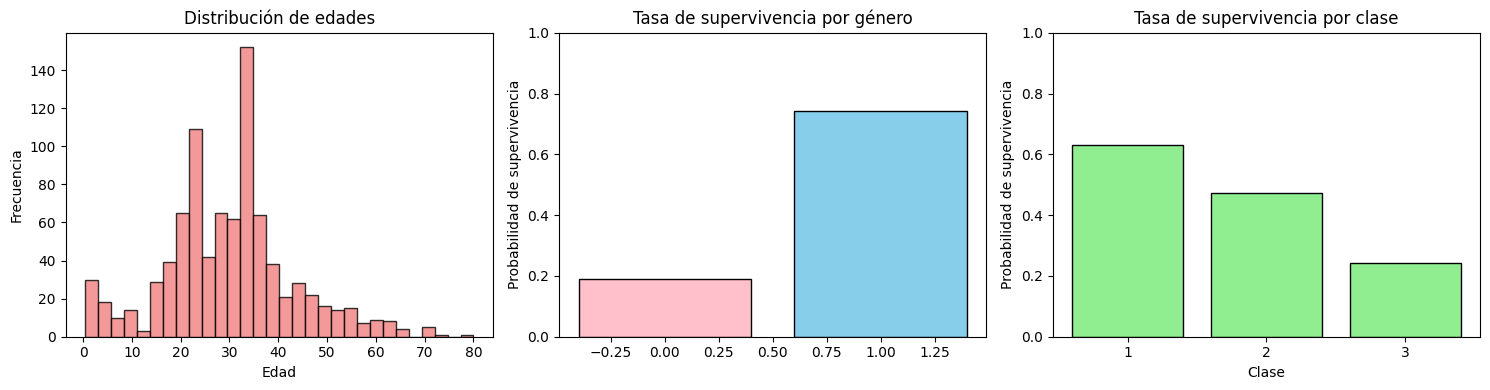

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Histograma de Age
ax[0].hist(df['Age'].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.8)
ax[0].set_title('Distribución de edades')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')

# Survived por Sex
sex_surv = df.groupby('Sex')['Survived'].mean()
ax[1].bar(sex_surv.index, sex_surv.values, color=['pink', 'skyblue'], edgecolor='black')
ax[1].set_title('Tasa de supervivencia por género')
ax[1].set_ylabel('Probabilidad de supervivencia')
ax[1].set_ylim(0, 1)

# Survived por Pclass
pclass_surv = df.groupby('Pclass')['Survived'].mean()
ax[2].bar(pclass_surv.index, pclass_surv.values, color='lightgreen', edgecolor='black')
ax[2].set_title('Tasa de supervivencia por clase')
ax[2].set_ylabel('Probabilidad de supervivencia')
ax[2].set_xlabel('Clase')
ax[2].set_xticks([1, 2, 3])
ax[2].set_ylim(0, 1)


plt.tight_layout()
plt.show()

# Ejercicio 8

Calcule la correlación lineal entre los atributos “Fare” (Tarifa) y “PClass” (clase del ticket). Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa). Explique el significado del valor de correlación obtenido. 

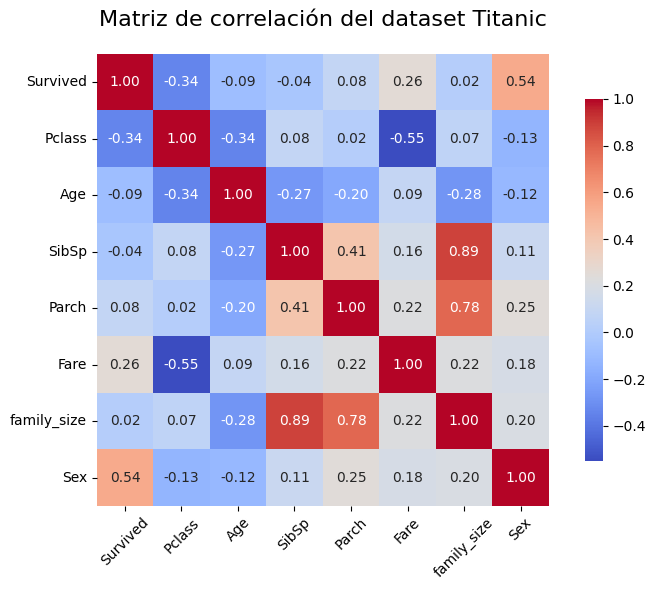

In [101]:
import seaborn as sns
# Usamos solo columnas numéricas
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', "family_size", 'Sex']
df_numeric = df[numeric_cols].copy()

# --- Matriz de correlación ---
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": 0.8})
plt.title('Matriz de correlación del dataset Titanic', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

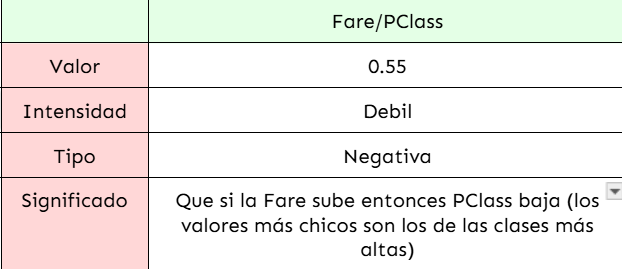

# Ejercicio 9

Realice un análisis sobre los valores de los atributos del dataset automobile.csv. Para cada atributo que no pueda ser procesado directamente, indique que problema tiene (valores nulos o vacíos, valores categóricos, valores atípicos o outliers, etc.) y como solucionarlo.

El problema es que en normalized-losses y en price hay valores nulos representados como "?"

In [102]:
df = pd.read_csv("automobile.csv")

# Reemplazo los valores ? por NA
df["normalized-losses"] = df["normalized-losses"].replace("?", pd.NA)
df["price"] = df["price"].replace("?", pd.NA)

# Reemplazo por la media, tengo que pasar los valores a float y no contar los NA xq explota
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors="coerce")
print(df["normalized-losses"].mean())
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].mean())

df["price"] = pd.to_numeric(df["price"], errors="coerce")
print(df["price"].mean())
df["price"] = df["price"].fillna(df["price"].mean())

122.0
13207.129353233831


# Ejercicio 10 
Dada la siguiente tabla con mediciones de 2 características correspondientes a mediciones de altura y peso 
de personas:

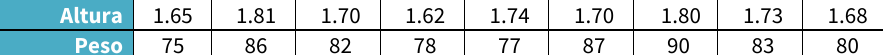

### a) Aplique las siguientes normalizaciones y grafíquelas con un diagrama de caja: MinMax, Standard y Robust



----DATOS INICIALES----
   Altura  Peso
0    1.65    75
1    1.81    86
2    1.70    82
3    1.62    78
4    1.74    77
5    1.70    87
6    1.80    90
7    1.73    83
8    1.68    80
------- MINMAX -------
     Altura      Peso
0  0.157895  0.000000
1  1.000000  0.733333
2  0.421053  0.466667
3  0.000000  0.200000
4  0.631579  0.133333
5  0.421053  0.800000
6  0.947368  1.000000
7  0.578947  0.533333
8  0.315789  0.333333
------- STANDARD -------
     Altura  Peso
0 -0.790295  -1.4
1  1.738649   0.8
2  0.000000   0.0
3 -1.264472  -0.8
4  0.632236  -1.0
5  0.000000   1.0
6  1.580590   1.6
7  0.474177   0.2
8 -0.316118  -0.4
------- ROBUST -------
     Altura   Peso
0 -0.500000 -0.375
1  2.166667  1.000
2  0.333333  0.500
3 -1.000000  0.000
4  1.000000 -0.125
5  0.333333  1.125
6  2.000000  1.500
7  0.833333  0.625
8  0.000000  0.250


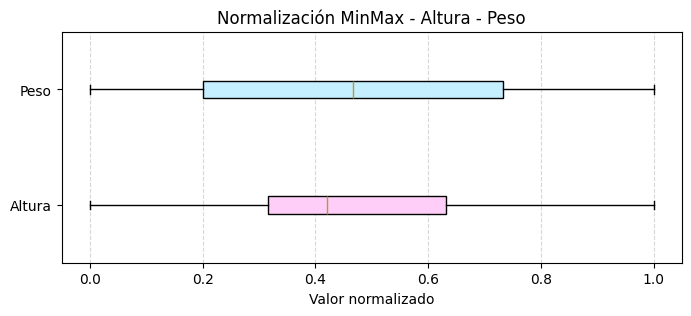

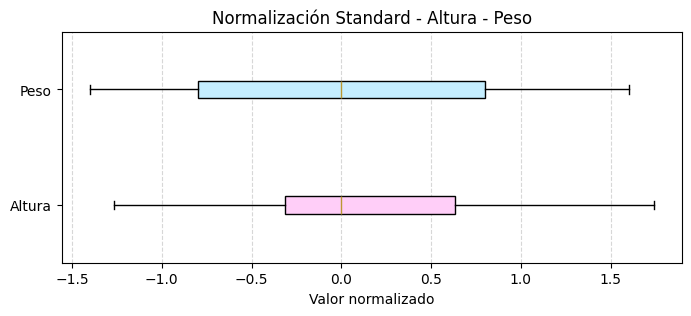

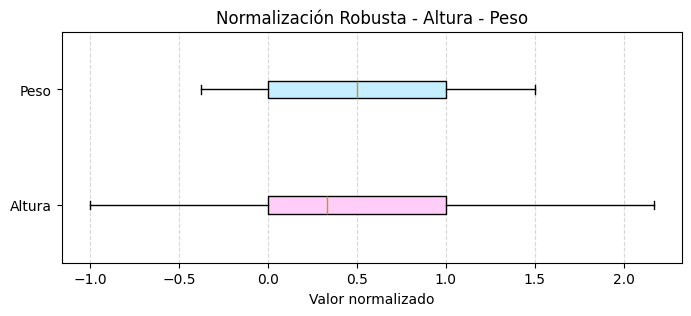

In [114]:
datos = {
    "Altura": [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68],
    'Peso': [75, 86, 82, 78, 77, 87, 90, 83, 80]
}
df = pd.DataFrame(datos)

# Datos iniciales
print("----DATOS INICIALES----")
print(df)

min = df.min()
max = df.max()
stdev = df.std()
media = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
ric = q3 - q1

# Normalización MinMax
minmax = (df - min) / (max - min)
print("------- MINMAX -------")
print(minmax)

# Standard
standard = (df - media) / stdev
print("------- STANDARD -------")
print(standard)

# Robust
robust = (df - q1) / (q3 - q1)
print("------- ROBUST -------")
print(robust)

# Grafico
normalizaciones = [minmax, standard, robust]
etiquetas = ["Normalización MinMax", "Normalización Standard", "Normalización Robusta"]

for norm, etiqueta in zip(normalizaciones, etiquetas):
    plt.figure(figsize=(8, 3))
    box = plt.boxplot(norm, vert=False, patch_artist=True)
    colors = ["#FFCEF8", "#C5EEFF"]  # naranja y celeste
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(f"{etiqueta} - Altura - Peso")
    plt.xlabel("Valor normalizado")
    plt.yticks([1, 2], ["Altura", "Peso"])
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

### b) Agregue la siguiente medición (2.20, 120) y repita el punto a) 

----DATOS INICIALES----
   Altura  Peso
0    1.65    75
1    1.81    86
2    1.70    82
3    1.62    78
4    1.74    77
5    1.70    87
6    1.80    90
7    1.73    83
8    1.68    80
9    2.20   120
------- MINMAX -------
     Altura      Peso
0  0.051724  0.000000
1  0.327586  0.244444
2  0.137931  0.155556
3  0.000000  0.066667
4  0.206897  0.044444
5  0.137931  0.266667
6  0.310345  0.333333
7  0.189655  0.177778
8  0.103448  0.111111
9  1.000000  1.000000
------- STANDARD -------
     Altura      Peso
0 -0.394596 -0.581025
1  0.576718  0.271145
2 -0.091061 -0.038735
3 -0.576718 -0.348615
4  0.151768 -0.426085
5 -0.091061  0.348615
6  0.516010  0.581025
7  0.091061  0.038735
8 -0.212475 -0.193675
9  2.944295  2.905125
------- ROBUST -------
   Altura      Peso
0   -0.35 -0.424242
1    1.25  0.909091
2    0.15  0.424242
3   -0.65 -0.060606
4    0.55 -0.181818
5    0.15  1.030303
6    1.15  1.393939
7    0.45  0.545455
8   -0.05  0.181818
9    5.15  5.030303


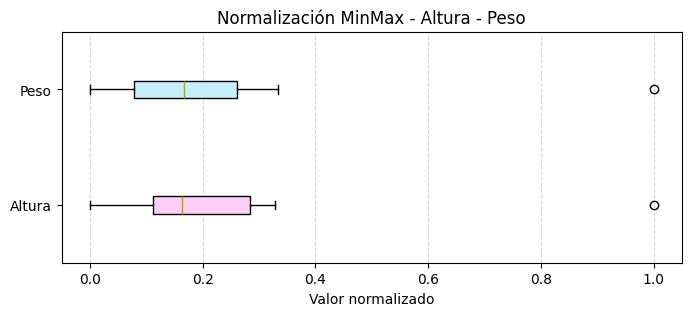

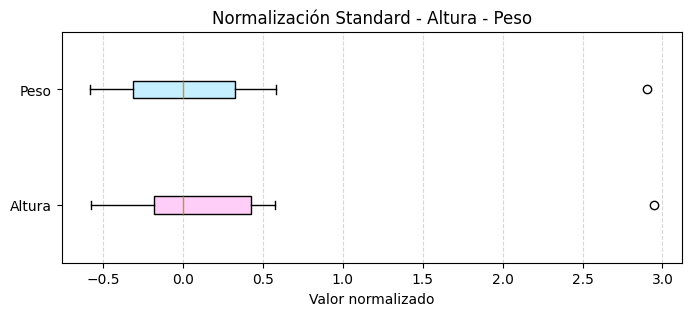

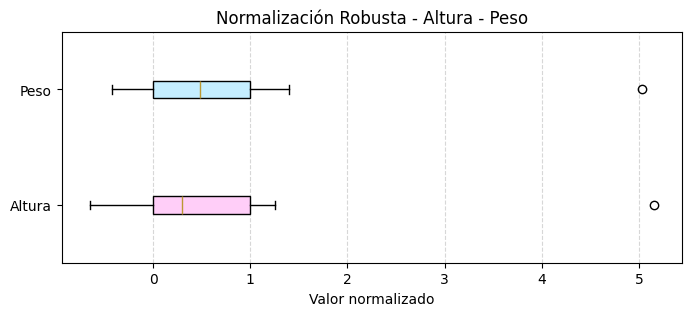

In [115]:
datos = {
    "Altura": [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68, 2.20],
    'Peso': [75, 86, 82, 78, 77, 87, 90, 83, 80, 120]
}
df = pd.DataFrame(datos)

# Datos iniciales
print("----DATOS INICIALES----")
print(df)

min = df.min()
max = df.max()
stdev = df.std()
media = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
ric = q3 - q1

# Normalización MinMax
minmax = (df - min) / (max - min)
print("------- MINMAX -------")
print(minmax)

# Standard
standard = (df - media) / stdev
print("------- STANDARD -------")
print(standard)

# Robust
robust = (df - q1) / (q3 - q1)
print("------- ROBUST -------")
print(robust)

# Grafico
normalizaciones = [minmax, standard, robust]
etiquetas = ["Normalización MinMax", "Normalización Standard", "Normalización Robusta"]

for norm, etiqueta in zip(normalizaciones, etiquetas):
    plt.figure(figsize=(8, 3))
    box = plt.boxplot(norm, vert=False, patch_artist=True)
    colors = ["#FFCEF8", "#C5EEFF"]  # naranja y celeste
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(f"{etiqueta} - Altura - Peso")
    plt.xlabel("Valor normalizado")
    plt.yticks([1, 2], ["Altura", "Peso"])
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

### c) Compare los diagramas de caja entre las normalizaciones de los puntos a) y b) y comente las diferencias. 

MinMax: al agregar (2.20, 120) el rango se estira mucho, y los demás valores quedan todos concentrados cerca de 0, perdiéndose la variabilidad en el diagrama de caja.

Standard: el nuevo valor cambia bastante la media y la desviación estándar; la mayoría de los datos se agrupan en torno a valores similares y aparece un outlier muy alejado, con bigotes largos.

Robust: casi no se modifica la escala central porque usa mediana y rango intercuartílico; el nuevo valor se muestra como un outlier, mientras que la caja y los demás datos permanecen prácticamente iguales.